In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ============================================================
# Import Libraries & Setup
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

# Display plots inline
%matplotlib inline

# Set display and plot styles
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

print("Libraries imported successfully.")


Libraries imported successfully.


In [ ]:
# ============================================================
# Load Datasets
# ============================================================
try:
    sold_df = pd.read_csv('/content/drive/MyDrive/colab notebooks/flippit/dataset/sold_properties.csv')
    forsale_df = pd.read_csv('/content/drive/MyDrive/colab notebooks/flippit/dataset/for_sale_properties.csv')

    print("Datasets loaded successfully.")
    print(f"Sold dataset shape: {sold_df.shape}")
    print(f"For-sale dataset shape: {forsale_df.shape}")

    display(sold_df.head())
    display(forsale_df.head())
except FileNotFoundError as e:
    print(f"Error: {e}")


Datasets loaded successfully.
Sold dataset shape: (816, 64)
For-sale dataset shape: (211, 64)


,property_url,property_id,listing_id,permalink,mls,mls_id,status,mls_status,text,style,formatted_address,full_street_line,street,unit,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_price_min,list_price_max,list_date,pending_date,sold_price,last_sold_date,last_sold_price,assessed_value,estimated_value,tax,tax_history,new_construction,lot_sqft,price_per_sqft,latitude,longitude,neighborhoods,county,fips_code,stories,hoa_fee,parking_garage,agent_id,agent_name,agent_email,agent_phones,agent_mls_set,agent_nrds_id,broker_id,broker_name,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,4652272877,NaN,25217-Roan-Ave_Warren_MI_48089_M46522-72877,NaN,NaN,SOLD,NaN,NaN,SINGLE_FAMILY,"25217 Roan Ave, Warren, MI, 48089",25217 Roan Ave,25217 Roan Ave,NaN,Warren,MI,48089,3.0,1.0,NaN,914.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,185000,2025-08-08,185000,NaN,208175.0,NaN,NaN,False,7405.0,202.0,42.480135,-82.998723,Southeast Warren,Macomb,26099,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://ap.rdcpix.com/2064986013/2de0af0a4ca9b...,https://ap.rdcpix.com/2064986013/2de0af0a4ca9b...
1,https://www.realtor.com/realestateandhomes-det...,4369581325,NaN,24842-Campbell-Ave_Warren_MI_48089_M43695-81325,NaN,NaN,SOLD,NaN,NaN,SINGLE_FAMILY,"24842 Campbell Ave, Warren, MI, 48089",24842 Campbell Ave,24842 Campbell Ave,NaN,Warren,MI,48089,3.0,1.0,NaN,912.0,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,125000,2025-08-13,125000,60940.0,137138.0,1603.0,"[{'assessment': {'building': None, 'land': Non...",False,12632.0,137.0,42.476488,-83.013038,Southeast Warren,Macomb,26099,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Van Dyke Public Schools, Michigan Mathematics ...",https://p.rdcpix.com/v01/l79d04d42-m0od-w480_h...,https://p.rdcpix.com/v01/l79d04d42-m0od-w480_h...
2,https://www.realtor.com/realestateandhomes-det...,4780020528,2.983991e+09,7218-Theut-Ave_Warren_MI_48091_M47800-20528,DEMI,2.025101e+10,SOLD,Sold,Take a look at this affordable turnkey two bed...,SINGLE_FAMILY,"7218 Theut Ave, Warren, MI, 48091",7218 Theut Ave,7218 Theut Ave,NaN,Warren,MI,48091,2.0,1.0,NaN,696.0,1953.0,48.0,105000.0,NaN,NaN,2025-07-08,2025-08-25,105000,2025-08-25,105000,35680.0,103400.0,1197.0,"[{'assessment': {'building': None, 'land': Non...",False,4356.0,151.0,42.467254,-83.030902,Southwest Warren,Macomb,26099,1.0,0.0,1.0,100515278.0,Lee M Johnson,johnson.lee.m@gmail.com,"[{'ext': None, 'primary': True, 'type': 'BUSIN...",A-DEMI-048928,NaN,NaN,NaN,NaN,NaN,2899327.0,O-DEMI-375382,"EXP Realty, LLC",mi.broker@exprealty.net,"[{'number': '8885017085', 'type': 'Office', 'p...","Rising Stars Academy, Van Dyke Public Schools,...",https://ap.rdcpix.com/8332e4a6e8226f054c3f4931...,https://ap.rdcpix.com/8332e4a6e8226f054c3f4931...
3,https://www.realtor.com/realestateandhomes-det...,4469185302,2.984418e+09,27565-Cosgrove-Dr_Warren_MI_48092_M44691-85302,DEMI,2.025102e+10,SOLD,Sold,This charming ranch has been lovingly cared fo...,SINGLE_FAMILY,"27565 Cosgrove Dr, Warren, MI, 48092",27565 Cosgrove Dr,27565 Cosgrove Dr,NaN,Warren,MI,48092,3.0,1.0,1.0,1184.0,1960.0,31.0,245000.0,NaN,NaN,2025-07-18,2025-07-20,250000,2025-08-18,250000,103640.0,248700.0,2582.0,"[{'assessment': {'building': None, 'land': Non...",False,7405.0,211.0,42.496116,-83.060634,Northwest Warren,Macomb,26099,1.0,0.0,2.0,3214619.0,Shelby Randazzo,shelby.randazzo@gmail.com,"[{'ext': None, 'primary': True, 'type': 'Offic...",A-DEMI-406523,NaN,3625229.0,Keller Williams Realty Lakeside - Broker,NaN,NaN,3624217.0,O-DEMI-306193,Keller Williams Lakeside,daveklaft@kwlakeside.com,"[{'number': '5865320500', 'type': 'office', 'p...",NaN,https://ap.rdcpix.com/22d72564408df40bed048e1a...,https://ap.rdcpix.com/22d72564408df40bed048e1a...
4,https://www.realtor.com/realestateandhomes-det...,4165565148,2.982340e+09,31859-Shawn-Dr_Warre

,property_url,property_id,listing_id,permalink,mls,mls_id,status,mls_status,text,style,formatted_address,full_street_line,street,unit,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_price_min,list_price_max,list_date,pending_date,sold_price,last_sold_date,last_sold_price,assessed_value,estimated_value,tax,tax_history,new_construction,lot_sqft,price_per_sqft,latitude,longitude,neighborhoods,county,fips_code,stories,hoa_fee,parking_garage,agent_id,agent_name,agent_email,agent_phones,agent_mls_set,agent_nrds_id,broker_id,broker_name,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,4726804762,2985582732,11429-Metter-Ave_Warren_MI_48089_M47268-04762,DEMI,20251026877,PENDING,Pending,"This beautifully updated 2 bed, 1 bath home fe...",SINGLE_FAMILY,"11429 Metter Ave, Warren, MI, 48089",11429 Metter Ave,11429 Metter Ave,NaN,Warren,MI,48089,2,1,NaN,1108,1950,29,129900,NaN,NaN,2025-08-21,2025-08-27,NaN,NaN,NaN,NaN,127900.0,NaN,NaN,False,12632,117,42.476913,-83.008960,Southeast Warren,Macomb,26099,1.0,0.0,1.0,100347481.0,Nicholas Thwany,nthwany@thehomealliance.com,"[{'ext': None, 'primary': True, 'type': 'BUSIN...",A-DEMI-444703,NaN,NaN,NaN,NaN,NaN,NaN,O-DEMI-406149,Trustlink Real Estate,NaN,"[{'number': '(586) 773-5000', 'type': 'Office'...",NaN,https://ap.rdcpix.com/9bcfcc6acda3197badef6dae...,https://ap.rdcpix.com/9bcfcc6acda3197badef6dae...
1,https://www.realtor.com/realestateandhomes-det...,3072930862,2985813568,14220-Freeman-St_Warren_MI_48089_M30729-30862,DEMI,20251031478,FOR_SALE,Active,Beautifully Updated Home with Modern Finishes!...,SINGLE_FAMILY,"14220 Freeman St, Warren, MI, 48089",14220 Freeman St,14220 Freeman St,NaN,Warren,MI,48089,3,2,NaN,1032,1971,22,159900,NaN,NaN,2025-08-28,NaN,NaN,NaN,NaN,67000.0,161000.0,2471.0,"[{'assessment': {'building': None, 'land': Non...",False,7841,155,42.451238,-82.977371,Southeast Warren,Macomb,26099,1.0,0.0,2.0,3777478.0,Madhavi Kondapalli,madvi.kondapalli@century21.com,"[{'ext': None, 'primary': True, 'type': 'BUSIN...",A-DEMI-278919,495502527.0,NaN,NaN,NaN,NaN,NaN,O-DEMI-42590212,Century 21 Professionals Livonia,NaN,"[{'number': '7344647111', 'type': None, 'prima...","Academy Of Warren, East Detroit Public Schools...",https://ap.rdcpix.com/f460051a355cdc2f628b5400...,https://ap.rdcpix.com/f460051a355cdc2f628b5400...
2,https://www.realtor.com/realestateandhomes-det...,4994858687,2986502177,8281-Meadow-Ave_Warren_MI_48089_M49948-58687,SEMI,50188840,FOR_SALE,Active,"Wow, what a cutie! This move-in-ready 3-bedroo...",SINGLE_FAMILY,"8281 Meadow Ave, Warren, MI, 48089",8281 Meadow Ave,8281 Meadow Ave,NaN,Warren,MI,48089,3,1,NaN,768,1935,1,165000,NaN,NaN,2025-09-18,NaN,NaN,NaN,NaN,41890.0,116200.0,3005.0,"[{'assessment': {'building': None, 'land': Non...",False,3485,215,42.454472,-83.021032,Southeast Warren,Macomb,26099,NaN,0.0,2.0,2755490.0,MARIO KATTULA,MARIO@KATTULACO.COM,"[{'ext': None, 'primary': True, 'type': 'Mobil...",A-SEMI-6501391391,NaN,3625229.0,Keller Williams Realty Lakeside - Broker,NaN,NaN,3624217.0,O-SEMI-2244158,Keller Williams Lakeside,daveklaft@kwlakeside.com,"[{'number': '5865320500', 'type': 'office', 'p...","Rising Stars Academy, Van Dyke Public Schools,...",https://ap.rdcpix.com/03835e3f3dc18276e37a7204...,https://ap.rdcpix.com/03835e3f3dc18276e37a7204...
3,https://www.realtor.com/realestateandhomes-det...,4247602008,2985552037,11006-Racine-Rd_Warren_MI_48093_M42476-02008,DEMI,20251029367,PENDING,Pending,Back on the market after strong activity and m...,SINGLE_FAMILY,"11006 Racine Rd, Warren, MI, 48093",11006 Racine Rd,11006 Racine Rd,NaN,Warren,MI,48093,3,1,1.0,1200,1959,29,255000,NaN,NaN,2025-08-21,2025-09-06,95000.0,1994-06-07,95000.0,NaN,253786.0,NaN,NaN,False,8712,213,42.510595,-83.017658,Northeast Warren,Macomb,26099,1.0,0.0,2.0,NaN,Sean Filsinger,sean_filsinger@icloud.com,"[{'ext': None, 'pri

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# ============================================================
# Check if last_sold_price provides any value
# ============================================================

sold_comparison = (sold_df["sold_price"] == sold_df["last_sold_price"])

print("Sold Properties:")
print("Total rows:", len(sold_df))
print("Same values:", sold_comparison.sum())
print("Different values:", (~sold_comparison).sum())
print("Examples where they differ:")
print(sold_df.loc[~sold_comparison, ["property_id", "sold_price", "last_sold_price"]].head())

# Compare columns in for_sale_properties
for_sale_comparison = (forsale_df["sold_price"] == forsale_df["last_sold_price"])

print("\nFor-Sale Properties:")
print("Total rows:", len(forsale_df))
print("Same values:", for_sale_comparison.sum())
print("Different values:", (~for_sale_comparison).sum())
print("Examples where they differ:")
print(forsale_df.loc[~for_sale_comparison, ["property_id", "sold_price", "last_sold_price"]].head())

Sold Properties:
Total rows: 816
Same values: 816
Different values: 0
Examples where they differ:
Empty DataFrame
Columns: [property_id, sold_price, last_sold_price]
Index: []

For-Sale Properties:
Total rows: 211
Same values: 135
Different values: 76
Examples where they differ:
    property_id  sold_price  last_sold_price
0    4726804762         NaN              NaN
1    3072930862         NaN              NaN
2    4994858687         NaN              NaN
7    3954617168         NaN              NaN
11   4063023795         NaN              NaN


In [ ]:
# ============================================================
# Data Cleaning & Core Columns
# ============================================================
# Define relevant columns
relevant_cols = [
    "property_id", "text", "zip_code",
    "beds", "full_baths", "half_baths", "sqft", "year_built", "days_on_mls",
    "list_price", "list_date", "sold_price", "estimated_value",
    "tax", "lot_sqft", "price_per_sqft", "latitude", "longitude",
    "neighborhoods", "stories", "hoa_fee", "parking_garage", "nearby_schools"
]

# Keep only relevant columns
sold_df_clean = sold_df[relevant_cols].copy()
forsale_df_clean = forsale_df[relevant_cols].copy()

# Check missing values
print("Missing values (Sold dataset):")
display(sold_df_clean.isnull().sum())

print("Missing values (For-Sale dataset):")
display(forsale_df_clean.isnull().sum())

# Remove invalid rows for Sold dataset
original_rows = len(sold_df_clean)
sold_df_clean.dropna(subset=['sold_price', 'sqft'], inplace=True)

sold_df_clean['price_per_sqft'] = sold_df_clean['sold_price'] / sold_df_clean['sqft']

sold_df_clean = sold_df_clean[sold_df_clean['price_per_sqft'] > 20]
sold_df_clean = sold_df_clean[sold_df_clean['sold_price'] > 350]

print(f"Removed {original_rows - len(sold_df_clean)} invalid rows from Sold dataset.")


Missing values (Sold dataset):


,0
property_id,0
text,224
zip_code,0
beds,106
full_baths,2
half_baths,476
sqft,3
year_built,2
days_on_mls,233
list_price,217


Missing values (For-Sale dataset):


,0
property_id,0
text,1
zip_code,0
beds,0
full_baths,0
half_baths,129
sqft,0
year_built,0
days_on_mls,0
list_price,0


Removed 5 invalid rows from Sold dataset.


In [ ]:
# ============================================================
# find duplicates
# ============================================================
duplicates_by_column = sold_df_clean.duplicated(subset=['property_id'])
display(sold_df_clean[duplicates_by_column])

print('-'*100)

duplicates_by_column = forsale_df_clean.duplicated(subset=['property_id'])
display(forsale_df_clean[duplicates_by_column])

,property_id,text,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,estimated_value,tax,lot_sqft,price_per_sqft,latitude,longitude,neighborhoods,stories,hoa_fee,parking_garage,nearby_schools


----------------------------------------------------------------------------------------------------


,property_id,text,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,estimated_value,tax,lot_sqft,price_per_sqft,latitude,longitude,neighborhoods,stories,hoa_fee,parking_garage,nearby_schools
129,3031043942,Welcome to your new haven! This charming 2-bed...,48089,2,1,NaN,696,1953,28,82500,2025-08-22,65000.0,82197.0,1309.0,4356,119,42.45357,-82.98774,Southeast Warren,1.0,0.0,1.0,"Academy Of Warren, Van Dyke Public Schools, Bl..."


min:  454.0
max:  3427.0
median:  1112.0


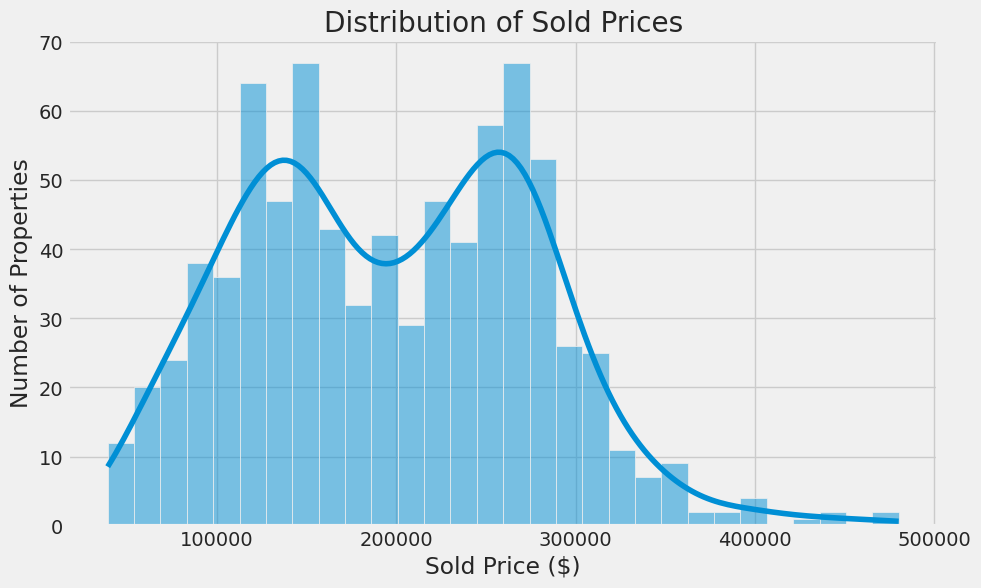

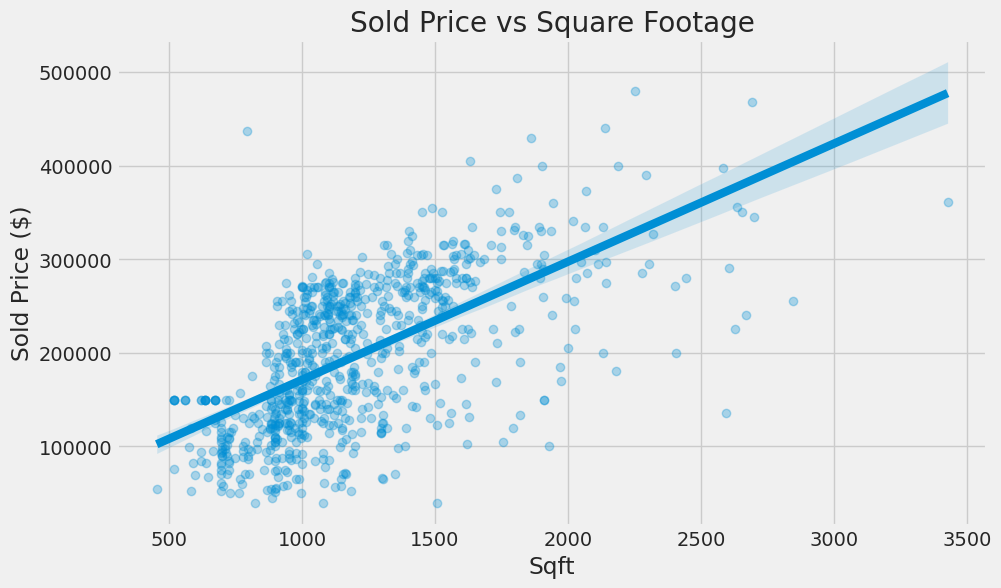

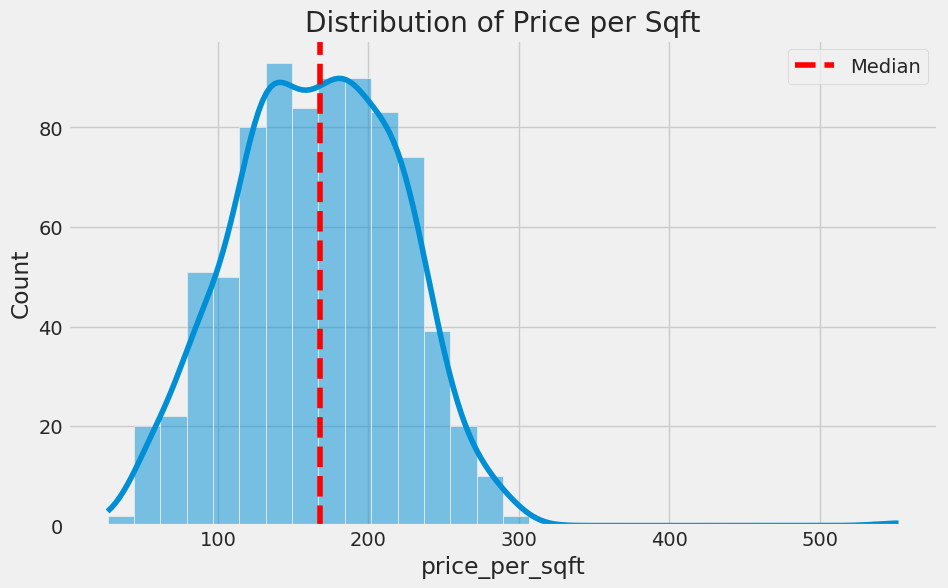

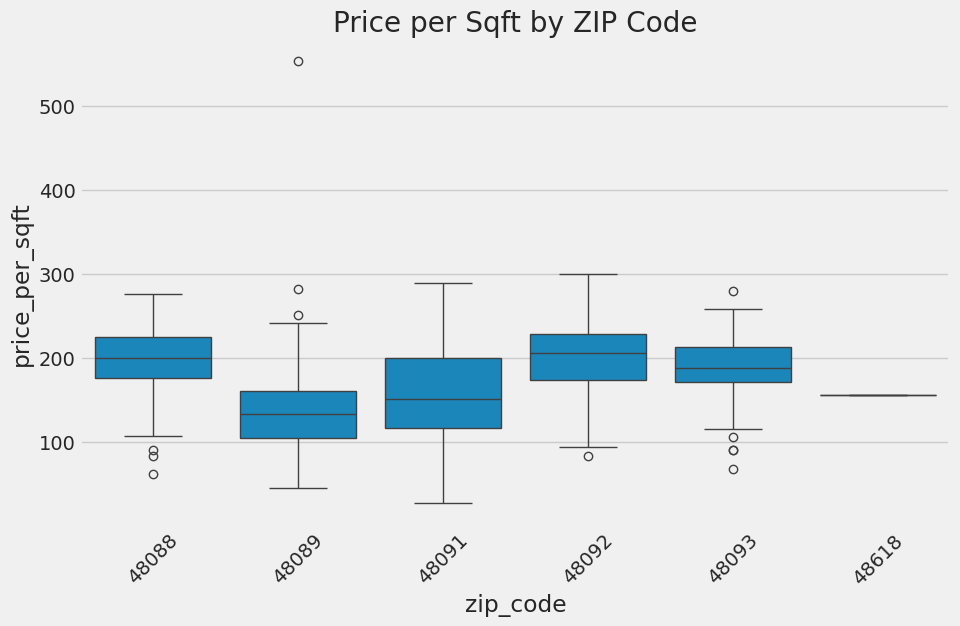

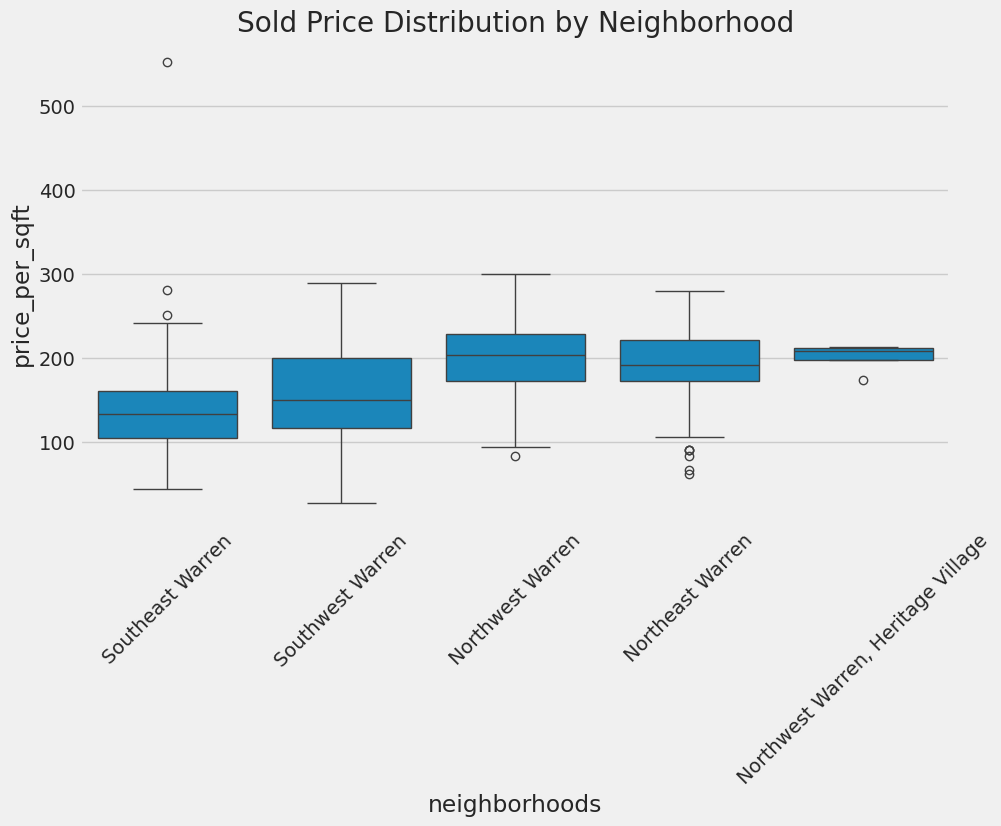

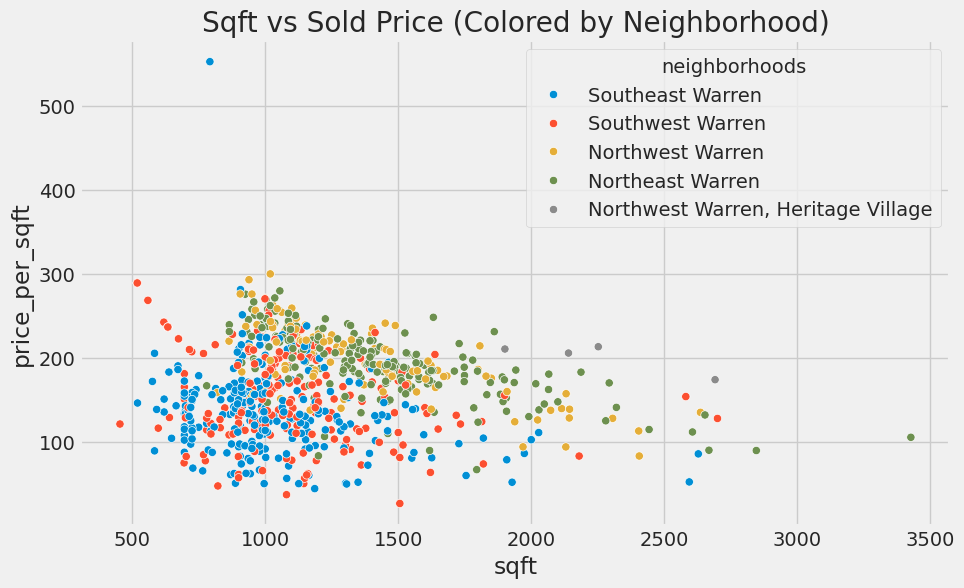

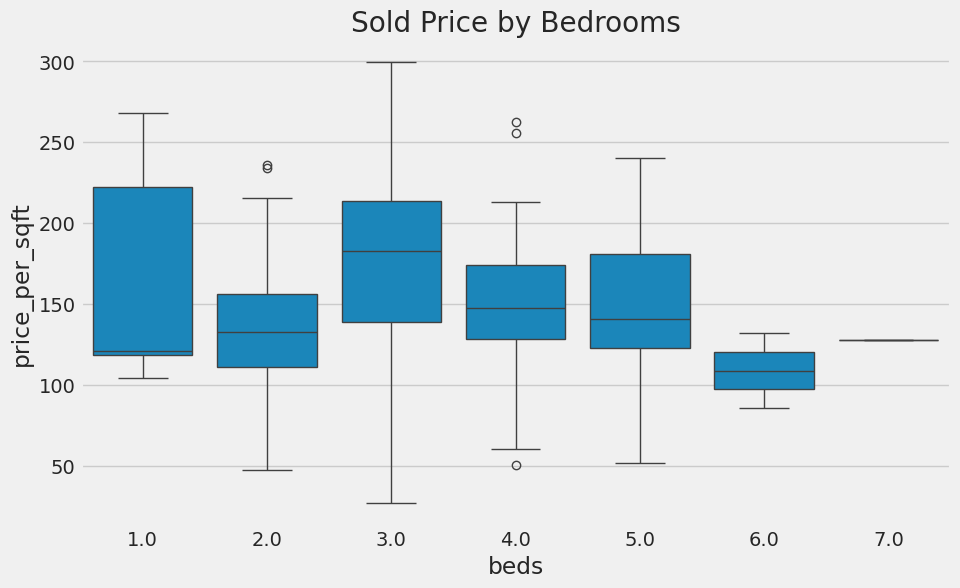

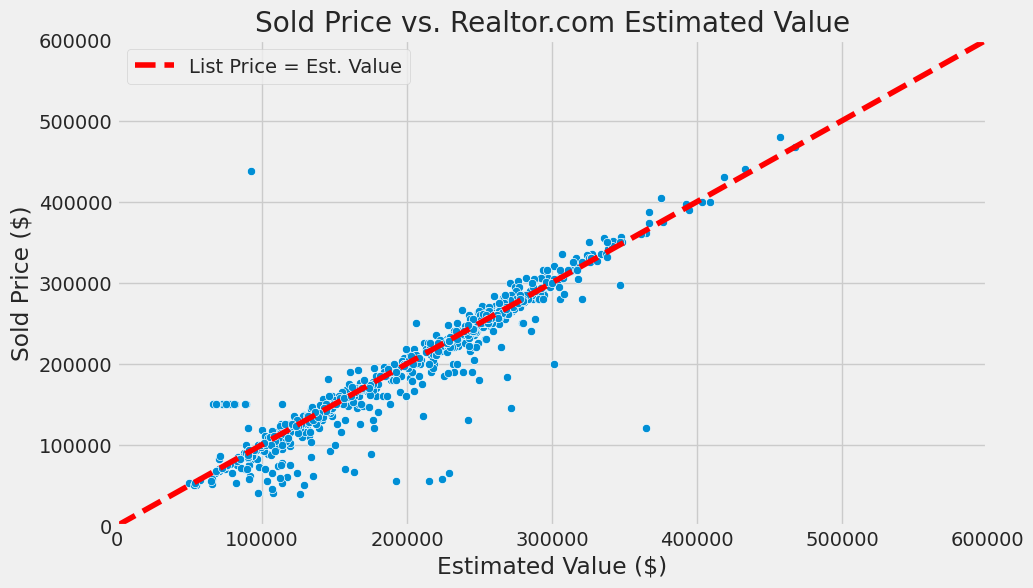

In [ ]:
# ============================================================
# Exploratory Data Analysis (Sold Properties)
# ============================================================

# sold_df measure of central tendency

print("min: ", sold_df_clean['sqft'].min())
print("max: ", sold_df_clean['sqft'].max())
print("median: ", sold_df_clean['sqft'].median())


# Distribution of Sold Prices
plt.figure(figsize=(10,6))
sns.histplot(sold_df_clean['sold_price'], kde=True, bins=30)
plt.title("Distribution of Sold Prices")
plt.xlabel("Sold Price ($)")
plt.ylabel("Number of Properties")
plt.show()

# Sqft vs Sold Price
plt.figure(figsize=(10,6))
sns.regplot(x='sqft', y='sold_price', data=sold_df_clean, scatter_kws={'alpha':0.3})
plt.title("Sold Price vs Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Sold Price ($)")
plt.show()

# Distribution of Price per Sqft
plt.figure(figsize=(10,6))
sns.histplot(sold_df_clean['price_per_sqft'], kde=True, bins=30)
plt.axvline(sold_df_clean['price_per_sqft'].median(), color='red', linestyle='--', label="Median")
plt.title("Distribution of Price per Sqft")
plt.legend()
plt.show()

# Price per Sqft by ZIP
plt.figure(figsize=(10,6))
sns.boxplot(x='zip_code', y='price_per_sqft', data=sold_df_clean)
plt.title("Price per Sqft by ZIP Code")
plt.xticks(rotation=45)
plt.show()

# Price per Sqft by neighborhood
plt.figure(figsize=(10,6))
sns.boxplot(data=sold_df_clean, x="neighborhoods", y="price_per_sqft")
plt.title("Sold Price Distribution by Neighborhood")
plt.xticks(rotation=45)
plt.show()



# price_per_sqft, sqft neighborhood
plt.figure(figsize=(10,6))
sns.scatterplot(data=sold_df_clean, x="sqft", y="price_per_sqft", hue="neighborhoods")
plt.title("Sqft vs Sold Price (Colored by Neighborhood)")
plt.show()


# price_per_sqft, Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(data=sold_df_clean, x="beds", y="price_per_sqft")
plt.title("Sold Price by Bedrooms")
plt.show()


# estimated_value, sold_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_value', y='sold_price', data=sold_df_clean)
plt.plot([0, 600000], [0, 600000], 'r--', label='List Price = Est. Value') # Add a diagonal line for reference
plt.title('Sold Price vs. Realtor.com Estimated Value')
plt.xlabel('Estimated Value ($)')
plt.ylabel('Sold Price ($)')
plt.legend()
plt.xlim(0, 600000)
plt.ylim(0, 600000)
plt.show()


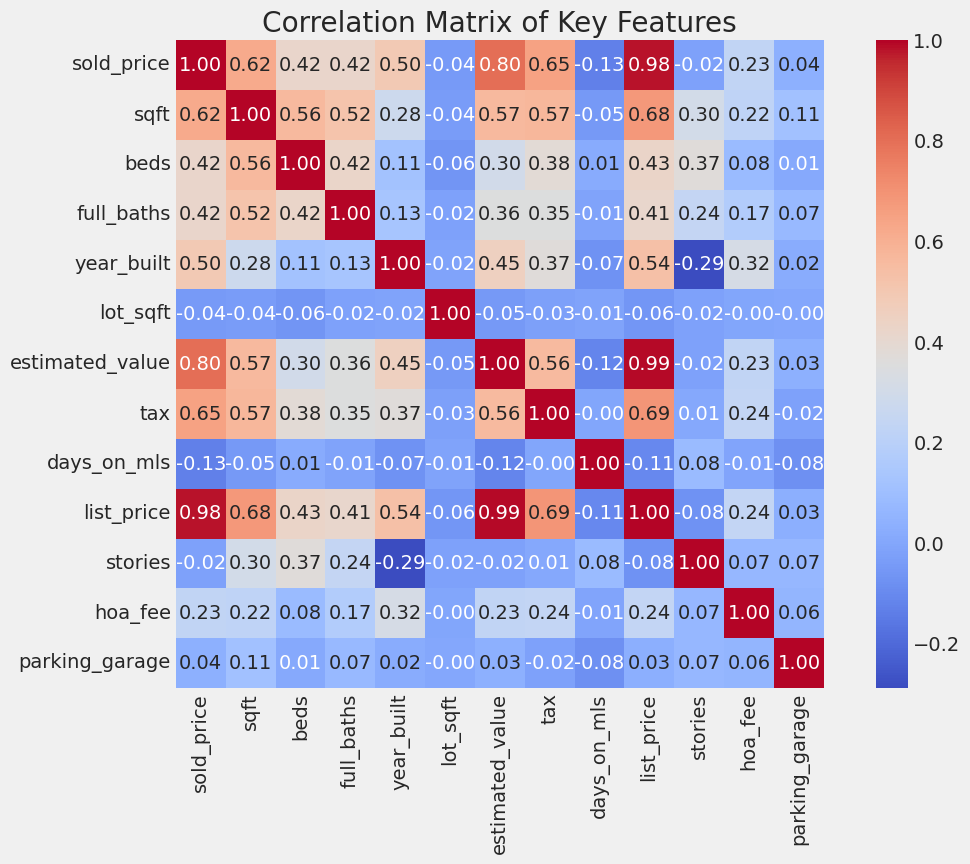

In [ ]:
# ============================================================
# Correlations & Key Drivers
# ============================================================
num_features = [
    "sold_price", "sqft", "beds", "full_baths", "year_built", "lot_sqft",
    "estimated_value", "tax", "days_on_mls", "list_price",
    "stories", "hoa_fee", "parking_garage"
]

corr_matrix = sold_df_clean[num_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Key Features")
plt.show()


In [ ]:
# ============================================================
# Text Feature Engineering (Keywords in Descriptions)
# ============================================================
sold_df_clean['text'] = sold_df_clean['text'].astype(str).fillna('')

keyword_map = {
    'has_granite': 'granite',
    'has_hardwood': 'hardwood|wood floor',
    'has_stainless': 'stainless steel|stainless appliances',
    'is_renovated': 'fully renovated|newly updated|updated|remodeled|new bath|move-in ready|turnkey|turn key|is_new_kitchen|new kitchen|is_new_roof|new roof',
    'is_fixer_upper': 'fixer|tlc|as-is|rehab|needs work|investor special'
}

# Loop through our keyword map to create a new column for each flag.
for column_name, search_term in keyword_map.items():
    sold_df_clean[column_name] = sold_df_clean['text'].str.contains(search_term, case=False, regex=True, na=False)
    # The regex=True argument allows us to use the '|' (OR) operator.
    print(f"Created '{column_name}' column. Found {sold_df_clean[column_name].sum()} mentions.")


# --- Analyze the Impact of These New Features ---
# My Thought Process: Now we validate if our engineered features are actually useful.
# We'll group by each new flag and see how it affects the median sold price. If there's a
# significant difference, we know the feature is valuable for our V2 model.

print("\n--- Analyzing Impact of Keywords on Median Sold Price ---")
for column_name in keyword_map.keys():
    # .groupby() separates the DataFrame into two groups: True and False for the keyword.
    # .median() calculates the median price for each group.
    price_impact = sold_df_clean.groupby(column_name)['sold_price'].median()

    # We use .get(True, 0) as a safe way to get the median price for properties
    # where the keyword was found. It defaults to 0 if no properties had that keyword.
    price_with_feature = price_impact.get(True, 0)
    price_without_feature = price_impact.get(False, 0)

    print(f"\nAnalysis for '{column_name}':")
    if price_with_feature > 0:
        print(f"  Median Price WITH feature: ${price_with_feature:,.0f}")
        print(f"  Median Price WITHOUT feature: ${price_without_feature:,.0f}")
        # Calculate the price difference, or "premium"
        premium = price_with_feature - price_without_feature
        print(f"  > Price Premium: ${premium:,.0f}")
    else:
        print("  No properties found with this feature.")


Created 'has_granite' column. Found 90 mentions.
Created 'has_hardwood' column. Found 211 mentions.
Created 'has_stainless' column. Found 90 mentions.
Created 'is_renovated' column. Found 380 mentions.
Created 'is_fixer_upper' column. Found 32 mentions.

--- Analyzing Impact of Keywords on Median Sold Price ---

Analysis for 'has_granite':
  Median Price WITH feature: $260,000
  Median Price WITHOUT feature: $190,000
  > Price Premium: $70,000

Analysis for 'has_hardwood':
  Median Price WITH feature: $247,000
  Median Price WITHOUT feature: $165,000
  > Price Premium: $82,000

Analysis for 'has_stainless':
  Median Price WITH feature: $260,000
  Median Price WITHOUT feature: $189,900
  > Price Premium: $70,100

Analysis for 'is_renovated':
  Median Price WITH feature: $225,000
  Median Price WITHOUT feature: $165,000
  > Price Premium: $60,000

Analysis for 'is_fixer_upper':
  Median Price WITH feature: $105,000
  Median Price WITHOUT feature: $200,000
  > Price Premium: $-95,000


/tmp/ipython-input-2085384627.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_df_clean.groupby(["zip_code", "sqft_range"])["price_per_sqft"]


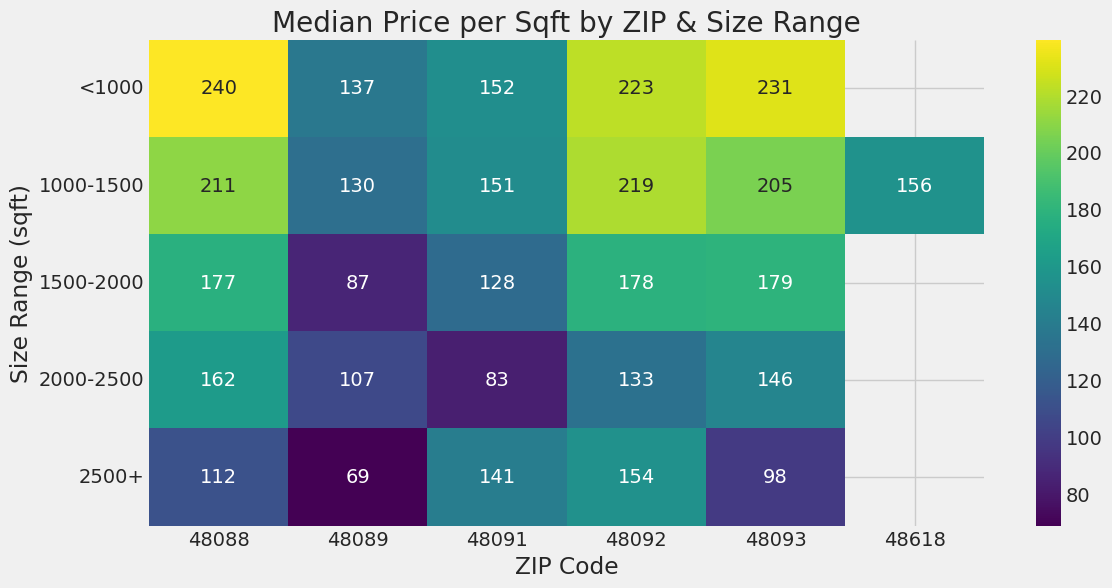

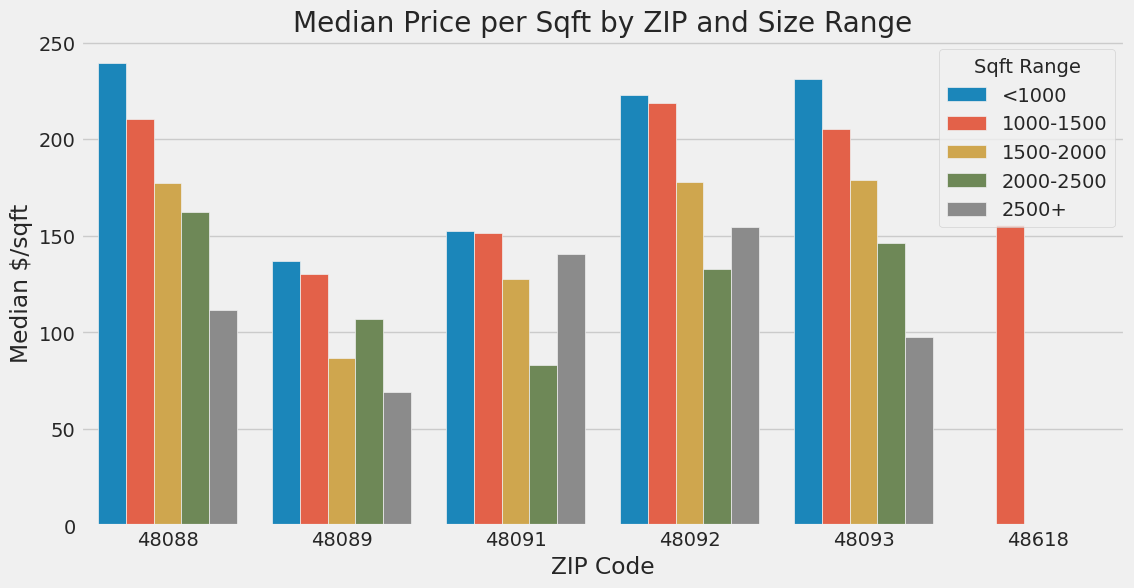

In [ ]:
# ============================================================
# Market Baseline: Median PPSqft by ZIP & Size Range
# ============================================================
bins = [0, 1000, 1500, 2000, 2500, 10000]
labels = ["<1000", "1000-1500", "1500-2000", "2000-2500", "2500+"]

sold_df_clean["sqft_range"] = pd.cut(sold_df_clean["sqft"], bins=bins, labels=labels, right=False)

median_ppsqft = (
    sold_df_clean.groupby(["zip_code", "sqft_range"])["price_per_sqft"]
    .median()
    .reset_index()
)

pivot_table = median_ppsqft.pivot(index="sqft_range", columns="zip_code", values="price_per_sqft")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="viridis")
plt.title("Median Price per Sqft by ZIP & Size Range")
plt.ylabel("Size Range (sqft)")
plt.xlabel("ZIP Code")
plt.show()



plt.figure(figsize=(12,6))
sns.barplot(
    data=median_ppsqft,
    x="zip_code", y="price_per_sqft", hue="sqft_range"
)
plt.title("Median Price per Sqft by ZIP and Size Range")
plt.ylabel("Median $/sqft")
plt.xlabel("ZIP Code")
plt.legend(title="Sqft Range")
plt.show()


/tmp/ipython-input-1974908252.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=school_ppsqft.head(15), x="price_per_sqft", y="school_list", palette="viridis")


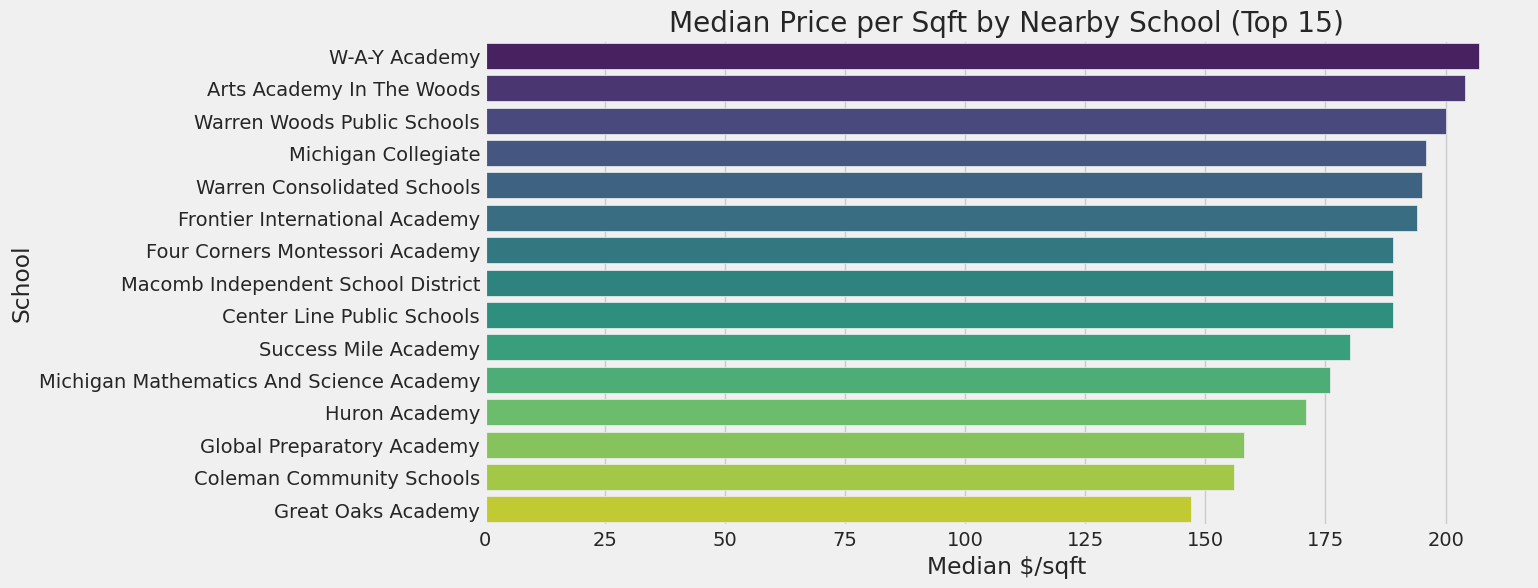

In [ ]:
# ============================================================
# Nearby Schools Analysis
# ============================================================
sold_df["school_list"] = sold_df["nearby_schools"].fillna("").apply(
    lambda x: [s.strip() for s in x.split(",") if s.strip() != ""]
)
school_prices = sold_df.explode("school_list")
school_prices = school_prices[school_prices["school_list"] != ""]

school_ppsqft = (
    school_prices.groupby("school_list")["price_per_sqft"]
    .median()
    .reset_index()
    .sort_values("price_per_sqft", ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(data=school_ppsqft.head(15), x="price_per_sqft", y="school_list", palette="viridis")
plt.title("Median Price per Sqft by Nearby School (Top 15)")
plt.xlabel("Median $/sqft")
plt.ylabel("School")
plt.show()
